In [1]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#-------------- Manitenance Scheduling --------------------#

In [3]:
# initializing the given data
capacity = 150
intervals = 4
units = np.array([20,15,35,40,15,15,10])
intervals_req = np.array([2,2,1,1,1,1,1])
loads = np.array([80,90,65,70])

# possible genes based on the intervals required
pool1 = np.array([[1,1,0,0],[0,1,1,0],[0,0,1,1]])
pool2 = np.array([[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]])

In [4]:
def fitness(chromosome):
    return max(0,min(np.array([capacity - (chromosome[:,i] @ units) for i in range(4)]) - loads))

In [5]:
def crossover(p1,p2,prob):
    if np.random.random() < prob:
        i = np.random.randint(0,7)
        c1 = np.concatenate([p1[0:i],p2[i:7]])
        c2 = np.concatenate([p2[0:i],p1[i:7]])
        return c1,c2    
    return p1,p2

In [6]:
def mutation(c,rate):
    if np.random.random() < rate:
        i = np.random.randint(0,7)
        if i < 2 : c[i] = pool1[np.random.randint(0,3)]
        else : c[i] = pool2[np.random.randint(0,4)]
    return c

In [7]:
def maintenance_scheduling(N, generations, crossover_prob, mutation_rate):
    
    # Creating initial population of size N
    chromosomes = np.array([[[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]] for i in range(N)])
        
    for i in range(N):
        for j in range(2):                                                # since, first two units required 2 intervals
            chromosomes[i][j] = pool1[np.random.randint(0,3)]
        for j in range(2,7):                                              # since, remainig units required 1 interval
            chromosomes[i][j] = pool2[np.random.randint(0,4)]


    best_fitness = [0]*generations
    avg_fitness = [0]*generations
    
    Generations = 0
    
    # Iterating for the given number of generations
    while Generations < generations :
        
        # calculating the fitness values for the current generation
        fitness_values = [fitness(i) for i in chromosomes]
        total_fitness = sum(fitness_values)
        
        # calculating the fitness ratio for the current generation
        fitness_ratios = [i/total_fitness for i in fitness_values]

        # calculating best fitness and avg fitness values of current generation
        best_fitness[Generations] = max(fitness_values)
        avg_fitness[Generations] = total_fitness/N

        new_Generation = []
        
        # untill the new generation size equals the current generation
        while len(new_Generation) < N:
            
            # Roulette wheel selection of parents based on fitness ratio
            p1 = chromosomes[np.random.choice(N,replace = True,p = fitness_ratios)]
            p2 = chromosomes[np.random.choice(N,replace = True,p = fitness_ratios)]
            
            # crossingover the parents to obtain offsprings
            c1,c2 = crossover(p1,p2,crossover_prob)
            
            # mutation of offsprings
            c1 = mutation(c1,mutation_rate)
            c2 = mutation(c2,mutation_rate)
            
            # Adding offsprings to new generation
            new_Generation.append(c1)
            new_Generation.append(c2)

        # Assingning new generation to current generation
        chromosomes = new_Generation
        Generations += 1
        
        # extracting some valid schedulings
        valid_schedulings = [chromosomes[i] for i in range(N) if fitness_values[i] == best_fitness[-1]]
        
    return best_fitness, avg_fitness, valid_schedulings


In [8]:
def printSchedulings(schedules):
    x = 0
    while x < min(2,len(schedules)):
        schedule = ["interval1: ","interval2: ","interval3: ","interval4: "]
        chromo = schedules[x]
        for i in range(7):
            for j in range(4):
                if chromo[i][j] == 1:
                    schedule[j] += "|"+str(units[i])
        x+=1
        [print(schedule[i]) for i in range(4)]
        print('')
        

In [9]:
# N                -> population size
# generations      -> no. of generations
# crossover_prob   -> crossover probability 
# mutation_rate    -> mutation probability

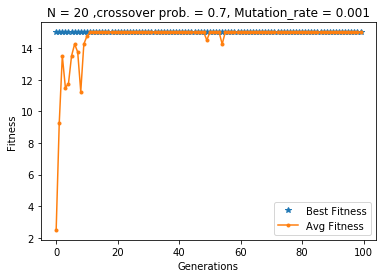

Some valid schedulings:
interval1: |40|10
interval2: |35
interval3: |20|15
interval4: |20|15|15|15

interval1: |40|10
interval2: |35
interval3: |20|15
interval4: |20|15|15|15



In [10]:
# required parameters
N = 20
generations = 100
crossover_prob = 0.7
mutation_rate = 0.001

# Applying Genetic Algorithm with required parameters
best_fitness, avg_fitness, valid_schedulings = maintenance_scheduling(N,generations,crossover_prob,mutation_rate)

# plotting
Generations = [i for i in range(0,generations)]
plt.plot(Generations,best_fitness,'*')
plt.plot(Generations,avg_fitness,'.-')
plt.legend(['Best Fitness','Avg Fitness'])
plt.title('N = '+str(N)+' ,crossover prob. = '+str(crossover_prob)+', Mutation_rate = '+str(mutation_rate))
plt.xlabel('Generations')
plt.ylabel('Fitness')
plt.show()

# printing some valid schedulings
print("Some valid schedulings:")
printSchedulings(valid_schedulings)

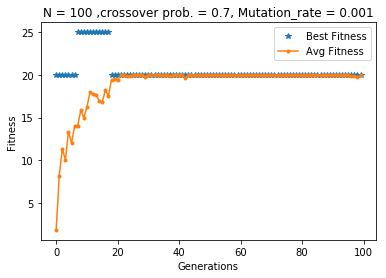

Some valid schedulings:
interval1: |20|15|15
interval2: |20|15
interval3: |35|15
interval4: |40|10

interval1: |20|15
interval2: |20|15
interval3: |35|15|15
interval4: |40|10



In [11]:
# required parameters
N = 100
generations = 100
crossover_prob = 0.7
mutation_rate = 0.001

# Applying Genetic Algorithm with required parameters
best_fitness, avg_fitness, valid_schedulings = maintenance_scheduling(N,generations,crossover_prob,mutation_rate)

# plotting
Generations = [i for i in range(0,generations)]
plt.plot(Generations,best_fitness,'*')
plt.plot(Generations,avg_fitness,'.-')
plt.legend(['Best Fitness','Avg Fitness'])
plt.title('N = '+str(N)+' ,crossover prob. = '+str(crossover_prob)+', Mutation_rate = '+str(mutation_rate))
plt.xlabel('Generations')
plt.ylabel('Fitness')
plt.show()

# printing some valid schedulings
print("Some valid schedulings:")
printSchedulings(valid_schedulings)

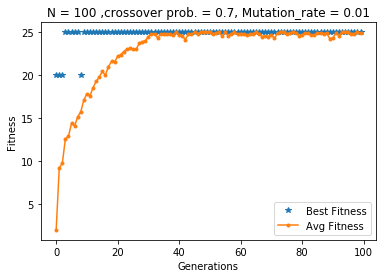

Some valid schedulings:
interval1: |20|15
interval2: |20|15
interval3: |15|35|10
interval4: |40|15

interval1: |20|15
interval2: |20|15
interval3: |15|35|10
interval4: |40|15



In [12]:
# required parameters
N = 100
generations = 100
crossover_prob = 0.7
mutation_rate = 0.01

# Applying Genetic Algorithm with required parameters
best_fitness, avg_fitness, valid_schedulings = maintenance_scheduling(N,generations,crossover_prob,mutation_rate)

# plotting
Generations = [i for i in range(0,generations)]
plt.plot(Generations,best_fitness,'*')
plt.plot(Generations,avg_fitness,'.-')
plt.legend(['Best Fitness','Avg Fitness'])
plt.title('N = '+str(N)+' ,crossover prob. = '+str(crossover_prob)+', Mutation_rate = '+str(mutation_rate))
plt.xlabel('Generations')
plt.ylabel('Fitness')
plt.show()

# printing some valid schedulings
print("Some valid schedulings:")
printSchedulings(valid_schedulings)

In [13]:
#------------ N-queen(8-queen) --------------#

In [14]:
def Nq_fitness(chromo):
    fitness = 0
    
    # couting the no. of non-attacking queen pairs
    for i in range(queens):
        for j in range(i+1,queens):
            if (chromo[i] == chromo[j] or chromo[j] - (j-i) == chromo[i] or chromo[j] + (j-i) == chromo[i]) == False:
                fitness += 1
    return fitness    

In [15]:
def Nq_crossover(p1,p2,prob):
    if np.random.random() < prob:
        i, j = np.random.randint(0,queens), np.random.randint(0,queens)
        if i>j : i, j = j, i
        diff = np.array([x for x in p2 if x not in p1[i:j]])
        c1 = np.concatenate([diff[:i],np.concatenate([p1[i:j],diff[i:]])])
        diff = np.array([x for x in p1 if x not in p2[i:j]])
        c2 = np.concatenate([diff[:i],np.concatenate([p2[i:j],diff[i:]])])
        return c1,c2
    return p1,p2

In [16]:
def Nq_mutation(c,rate):
    if np.random.random() < rate:
        i, j = np.random.randint(0,queens), np.random.randint(0,queens)
        c[i], c[j] = c[j], c[i]
    return c

In [17]:
def N_queen(N, queens, generations, crossover_prob, mutation_rate):
    
    # Generating Initial population of size N
    arr = [i for i in range(queens)]
    chromosomes = np.array([np.random.permutation(arr) for i in range(N)])

    best_fitness = [0]*generations
    avg_fitness = [0]*generations
    valid_configs = []
    
    Generations = 0
    
    # Iterating for the given number of generations
    while Generations < generations :
        
        # calculating the fitness values for the current generation
        fitness_values = [Nq_fitness(i) for i in chromosomes]
        total_fitness = sum(fitness_values)
        
        # calculating the fitness ratio for the current generation
        fitness_ratios = [i/total_fitness for i in fitness_values]

        # calculating best fitness and avg fitness values of current generation
        best_fitness[Generations] = max(fitness_values)
        avg_fitness[Generations] = total_fitness/N
        
        # extracting some valid configurations
        if len(valid_configs) < 3:
            [valid_configs.append(chromosomes[i]) for i in range(N) if fitness_values[i] == 28]

        new_Generation = []
        
        # untill the new generation size equals the current generation
        while len(new_Generation) < N:
            
            # Roulette wheel selection of parents based on fitness ratio
            p1 = chromosomes[np.random.choice(N,replace = True,p = fitness_ratios)]
            p2 = chromosomes[np.random.choice(N,replace = True,p = fitness_ratios)]
            
            # crossingover the parents to obtain offsprings
            c1,c2 = Nq_crossover(p1,p2,crossover_prob)
            
            # mutation of offsprings
            c1 = Nq_mutation(c1,mutation_rate)
            c2 = Nq_mutation(c2,mutation_rate)
            
            # Adding offsprings to new generation
            new_Generation.append(c1)
            new_Generation.append(c2)

        # Assingning new generation to current generation
        chromosomes = new_Generation
        Generations += 1
               
    return best_fitness, avg_fitness, valid_configs

In [18]:
def printConfigs(configs):
    x=0
    while x<min(2,len(configs)):
        configuration = ["________"]*queens
        chromo = configs[x]
        for i in range(queens):
            configuration[i] = configuration[i][:chromo[i]]+'Q'+configuration[i][chromo[i]+1:]
        x+=1
        [print(i) for i in configuration]
        print('')
    

In [19]:
# N                -> population size
# queens           -> no. of queens (8)
# generations      -> no. of generations
# crossover_prob   -> crossover probability 
# mutation_rate    -> mutation probability

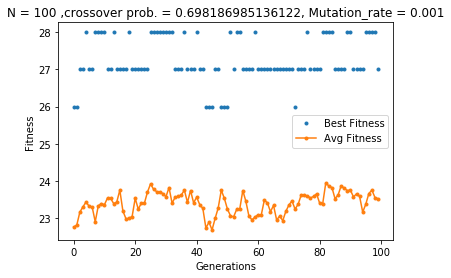

Some valid configurations:
Q_______
_____Q__
_______Q
__Q_____
______Q_
___Q____
_Q______
____Q___

___Q____
Q_______
____Q___
_______Q
_Q______
______Q_
__Q_____
_____Q__



In [20]:
# required parameters
N = 100
queens = 8
generations = 100
crossover_prob = np.random.uniform(0.5,0.7)
mutation_rate = 0.001

# Applying Genetic Algorithm with required parameters
Nq_best_fitness, Nq_avg_fitness, Nq_valid_configs = N_queen(N, queens, generations, crossover_prob, mutation_rate)

# plotting
Generations = [i for i in range(0,generations)]
plt.plot(Generations,Nq_best_fitness,'.')
plt.plot(Generations,Nq_avg_fitness,'.-')
plt.legend(['Best Fitness','Avg Fitness'])
plt.title('N = '+str(N)+' ,crossover prob. = '+str(crossover_prob)+', Mutation_rate = '+str(mutation_rate))
plt.xlabel('Generations')
plt.ylabel('Fitness')
plt.show()

# printing some valid configurations
print("Some valid configurations:")
printConfigs(Nq_valid_configs)

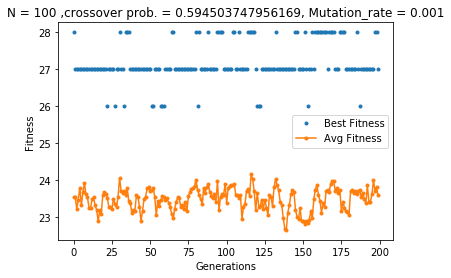

Some valid configurations:
____Q___
______Q_
Q_______
___Q____
_Q______
_______Q
_____Q__
__Q_____

___Q____
_____Q__
_______Q
_Q______
______Q_
Q_______
__Q_____
____Q___



In [21]:
# required parameters
N = 100
queens = 8
generations = 200
crossover_prob = np.random.uniform(0.5,0.7)
mutation_rate = 0.001

# Applying Genetic Algorithm with required parameters
Nq_best_fitness, Nq_avg_fitness, Nq_valid_configs = N_queen(N, queens, generations, crossover_prob, mutation_rate)

# plotting
Generations = [i for i in range(0,generations)]
plt.plot(Generations,Nq_best_fitness,'.')
plt.plot(Generations,Nq_avg_fitness,'.-')
plt.legend(['Best Fitness','Avg Fitness'])
plt.title('N = '+str(N)+' ,crossover prob. = '+str(crossover_prob)+', Mutation_rate = '+str(mutation_rate))
plt.xlabel('Generations')
plt.ylabel('Fitness')
plt.show()

# printing some valid configurations
print("Some valid configurations:")
printConfigs(Nq_valid_configs)

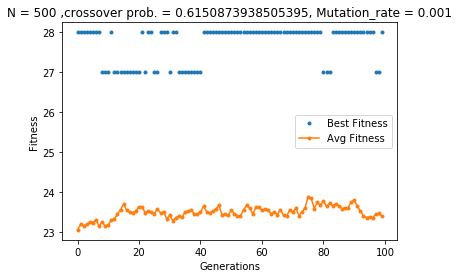

Some valid configurations:
______Q_
__Q_____
_______Q
_Q______
____Q___
Q_______
_____Q__
___Q____

______Q_
___Q____
_Q______
____Q___
_______Q
Q_______
__Q_____
_____Q__



In [22]:
# required parameters
N = 500
queens = 8
generations = 100
crossover_prob = np.random.uniform(0.5,0.7)
mutation_rate = 0.001

# Applying Genetic Algorithm with required parameters
Nq_best_fitness, Nq_avg_fitness, Nq_valid_configs = N_queen(N, queens, generations, crossover_prob, mutation_rate)

# plotting
Generations = [i for i in range(0,generations)]
plt.plot(Generations,Nq_best_fitness,'.')
plt.plot(Generations,Nq_avg_fitness,'.-')
plt.legend(['Best Fitness','Avg Fitness'])
plt.title('N = '+str(N)+' ,crossover prob. = '+str(crossover_prob)+', Mutation_rate = '+str(mutation_rate))
plt.xlabel('Generations')
plt.ylabel('Fitness')
plt.show()

# printing some valid configurations
print("Some valid configurations:")
printConfigs(Nq_valid_configs)

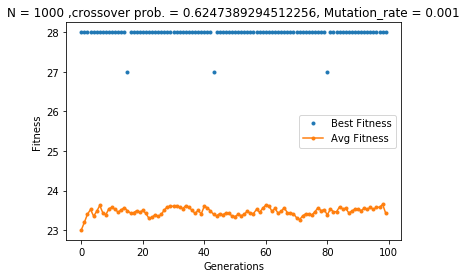

Some valid configurations:
___Q____
_Q______
_______Q
____Q___
______Q_
Q_______
__Q_____
_____Q__

_____Q__
__Q_____
______Q_
_Q______
_______Q
____Q___
Q_______
___Q____



In [23]:
# required parameters
N = 1000
queens = 8
generations = 100
crossover_prob = np.random.uniform(0.5,0.7)
mutation_rate = 0.001

# Applying Genetic Algorithm with required parameters
Nq_best_fitness, Nq_avg_fitness, Nq_valid_configs = N_queen(N, queens, generations, crossover_prob, mutation_rate)

# plotting
Generations = [i for i in range(0,generations)]
plt.plot(Generations,Nq_best_fitness,'.')
plt.plot(Generations,Nq_avg_fitness,'.-')
plt.legend(['Best Fitness','Avg Fitness'])
plt.title('N = '+str(N)+' ,crossover prob. = '+str(crossover_prob)+', Mutation_rate = '+str(mutation_rate))
plt.xlabel('Generations')
plt.ylabel('Fitness')
plt.show()

# printing some valid configurations
print("Some valid configurations:")
printConfigs(Nq_valid_configs)